### Student Information
Name: 周昱宏

Student ID: 108020022

GitHub ID: AnderStudio

Kaggle name: AnderWind

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [146]:
### Begin Assignment Here

# ① First Part

#### 完成在 DM2022-Lab2-Master 的專案中，網址連結：https://github.com/AnderStudio/DM2022-Lab2-Master.git

# ② Second Part

#### 名次參考上方圖片

#  ③ Third Part

## 1 - Load Data & Import Package

In [80]:
import pandas as pd

In [81]:
data_identification_df = pd.read_csv("./dm2022-isa5810-lab2-homework/data_identification.csv")

In [82]:
emotion_df = pd.read_csv("./dm2022-isa5810-lab2-homework/emotion.csv")

In [83]:
sampleSubmission_df = pd.read_csv("./dm2022-isa5810-lab2-homework/sampleSubmission.csv")

In [84]:
tweets_DM_df = pd.read_json("./dm2022-isa5810-lab2-homework/tweets_DM.json", lines=True)

## 2 - Preprocessing

### 2-1 - Create Training & Testing Dataframe

#### Training 的資料有 1455563 筆

In [85]:
train_id_list = list(data_identification_df['tweet_id'][data_identification_df['identification'] == 'train'])

In [86]:
len(train_id_list)

1455563

#### Testing 的資料有 411972 筆

In [87]:
test_id_list = list(data_identification_df['tweet_id'][data_identification_df['identification'] == 'test'])

In [88]:
len(test_id_list)

411972

In [89]:
len(train_id_list) + len(test_id_list) == len(data_identification_df)

True

In [90]:
len(train_id_list) == len(emotion_df)

True

#### Create Hashtags, Tweet_id, Text Feature From Raw Data

In [91]:
dict_list = []
count = 0
for source in tweets_DM_df['_source']:
    dic = dict(source)
    dic_tweet = dic['tweet']
    dict_list.append(dic_tweet)
tweets_DM_extract_df = pd.DataFrame(dict_list)

In [92]:
tweets_DM_extract_df

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


#### Extract Train Data And Create Label Column

In [93]:
train_df = tweets_DM_extract_df.loc[tweets_DM_extract_df['tweet_id'].isin(train_id_list)]

In [94]:
train_df

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>
...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [95]:
emotion_dict = dict(zip(emotion_df.tweet_id, emotion_df.emotion))

In [96]:
emotion_list = []
for tweet_id in train_df['tweet_id']:
    emotion_list.append(emotion_dict[tweet_id])
train_df['category'] = emotion_list

/var/folders/8p/36v_glgs3wj4pnsbb3pr02th0000gn/T/ipykernel_1428/2664700299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['category'] = emotion_list


In [97]:
train_df = train_df.reset_index()

In [98]:
categories = {'anger':0,
 'anticipation':1,
 'disgust':2,
 'fear':3,
 'joy':4,
 'sadness':5,
 'surprise':6,
 'trust':7}

In [99]:
label_list = []
for category in train_df['category']:
    label_list.append(categories[category])
train_df['label'] = label_list

最終的 trian dataframe 形式

In [100]:
train_df

,index,hashtags,tweet_id,text,category,label
0,0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,1
1,1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,5
2,3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,3
3,5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,4
4,6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,1
...,...,...,...,...,...,...
1455558,1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy,4
1455559,1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,joy,4
1455560,1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,joy,4
1455561,1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy,4


In [101]:
train_df.to_pickle('train_df.pkl')

#### Extract Test Data

In [102]:
test_dict = dict(zip(tweets_DM_extract_df.tweet_id, tweets_DM_extract_df.text))

In [103]:
text_list = []
for idx in sampleSubmission_df['id']:
    text_list.append(test_dict[idx])
sampleSubmission_df['text'] = text_list

In [104]:
sampleSubmission_df.to_pickle('test_df.pkl')

### 2-2 - Feature Engineering & Data Analysis

#### 2-2-1 - 各個情緒類別的數量分佈（分佈相當不平均）

In [105]:
train_df = pd.read_pickle('./train_df.pkl')

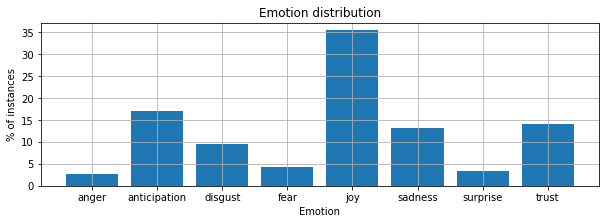

In [106]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['category'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['category']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

#### 2-2-2 - 文字雲（不同類別文字詞頻也會不相同，因此模型首要以適合詞頻分析的貝氏分類器進行訓練）

In [107]:
categories_re = {0:'anger',
 1:'anticipation',
 2:'disgust',
 3:'fear',
 4:'joy',
 5:'sadness',
 6:'surprise',
 7:'trust'}

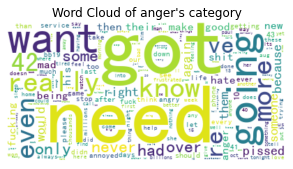

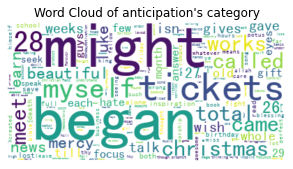

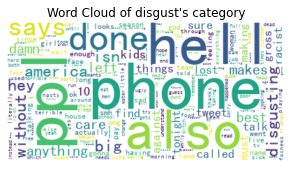

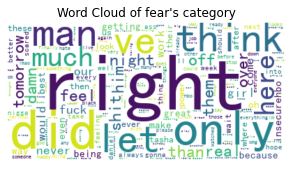

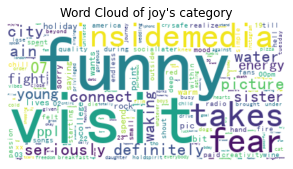

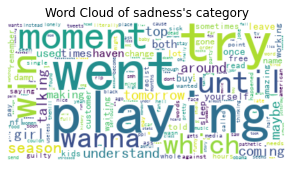

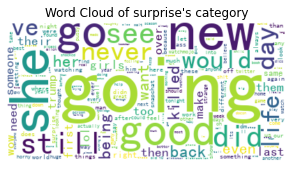

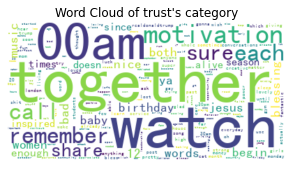

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0, 8):
    train_df_anger = train_df.loc[train_df['label'] == i]

    count_vect = CountVectorizer()
    counts = count_vect.fit_transform(train_df_anger.text) #learn the vocabulary and return document-term matrix

    term_frequencies = []

    term_frequencies = np.asarray(counts.sum(axis=0))[0]

    comdf = pd.DataFrame({"words": count_vect.get_feature_names_out(),"freq": term_frequencies})

    comdf = comdf.drop(comdf[comdf['freq'] < 60].index)

    comdf = comdf.drop(comdf[comdf['freq'] > 1000].index)

    frequencies = dict(zip(comdf['words'], comdf['freq']))

    wordcloud = WordCloud(background_color='white', font_path='SimHei.ttf').fit_words(frequencies)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title("Word Cloud of " + categories_re[i] + "'s category")
    _ = ax.imshow(wordcloud, interpolation='bilinear')
    _ = ax.axis("off")
    #fig.savefig("images/countvect_wordcloud.png", bbox_inches = 'tight', pad_inches = 0)

## 3 - Model Design

### 3-1 - Naive Bayes Classifier

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import numpy as np

In [110]:
train_df = pd.read_pickle('./train_df.pkl')

In [111]:
test_df = pd.read_pickle('./test_df.pkl')

#### 3-1-1 - Word Frequency Feature-based 

In [119]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
#, tokenizer=nltk.word_tokenize
cont_vect = CountVectorizer(max_features = 283626)
X_counts = cont_vect.fit_transform(train_df.text)

print(X_counts)

  (0, 168994)	1
  (0, 276019)	1
  (0, 173228)	1
  (0, 11559)	1
  (0, 144118)	1
  (0, 163324)	1
  (0, 240838)	1
  (0, 152468)	1
  (0, 40960)	1
  (0, 70704)	1
  (0, 66945)	1
  (0, 140678)	1
  (0, 254566)	1
  (0, 133327)	1
  (1, 133327)	2
  (1, 49381)	1
  (1, 26842)	1
  (1, 273582)	1
  (1, 217744)	1
  (1, 263618)	1
  (1, 116202)	1
  (1, 68069)	1
  (1, 260354)	1
  (1, 91616)	1
  (1, 25761)	1
  :	:
  (1455561, 133327)	1
  (1455561, 254744)	2
  (1455561, 53059)	1
  (1455561, 281413)	1
  (1455561, 162078)	1
  (1455561, 133653)	1
  (1455561, 123802)	1
  (1455561, 121485)	1
  (1455561, 116706)	1
  (1455561, 275563)	1
  (1455561, 130918)	1
  (1455561, 12947)	1
  (1455561, 268647)	1
  (1455561, 68800)	1
  (1455561, 260030)	1
  (1455561, 185623)	1
  (1455561, 268088)	1
  (1455561, 63971)	1
  (1455561, 16623)	1
  (1455562, 40960)	1
  (1455562, 133327)	1
  (1455562, 260354)	1
  (1455562, 45997)	1
  (1455562, 135337)	1
  (1455562, 248777)	1


In [120]:
Y = train_df['label']

In [121]:
X_train, X_val, Y_train, Y_val= train_test_split(X_counts, Y, test_size=0.3, random_state=42) 

mnb_freq = MultinomialNB()
mnb_freq.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Y_result = mnb_freq.predict(X_val)
print(accuracy_score(Y_val, Y_result))

0.5346933260661966


將 test_df 進行 predict 並打包成 result.csv

In [122]:
X_counts = cont_vect.fit_transform(test_df.text)

In [123]:
Y_result = mnb_freq.predict(X_counts)

In [124]:
Y_result

array([6, 0, 0, ..., 6, 0, 0])

In [125]:
categories_re = {0:'anger',
 1:'anticipation',
 2:'disgust',
 3:'fear',
 4:'joy',
 5:'sadness',
 6:'surprise',
 7:'trust'}

In [126]:
sampleSubmission_df['result'] = Y_result

In [127]:
emo_list = []
for result in sampleSubmission_df['result']:
    emo_list.append(categories_re[result])
sampleSubmission_df['emotion'] = emo_list

In [128]:
sampleSubmission_df = sampleSubmission_df.drop(columns = ['result'])

In [129]:
sampleSubmission_df.to_csv('result.csv',index=False)

#### 3-1-2 - TFIDF Feature-based 

In [134]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
#, tokenizer=nltk.word_tokenize
TFIDF_vect = TfidfVectorizer(max_features = 283626)
X_TFIDF = TFIDF_vect.fit_transform(train_df.text)

print(X_TFIDF)

  (0, 133327)	0.04787596718389248
  (0, 254566)	0.14783626798855865
  (0, 140678)	0.23520311346448602
  (0, 66945)	0.3437106171749634
  (0, 70704)	0.5075481326044758
  (0, 40960)	0.15502721396723207
  (0, 152468)	0.2706357528600548
  (0, 240838)	0.3451673245456607
  (0, 163324)	0.14544626068552036
  (0, 144118)	0.15472761164180385
  (0, 11559)	0.3362958884583734
  (0, 173228)	0.3030865572460228
  (0, 276019)	0.19752218961324744
  (0, 168994)	0.19825602218274926
  (1, 60764)	0.2519903503779065
  (1, 263780)	0.4878242642976155
  (1, 275115)	0.14506372565823172
  (1, 278496)	0.18847734629605556
  (1, 254744)	0.07913001615341096
  (1, 25761)	0.2198679383712443
  (1, 91616)	0.4346074289545518
  (1, 260354)	0.0844313119315993
  (1, 68069)	0.31163473936959124
  (1, 116202)	0.09971794157451376
  (1, 263618)	0.20779953429105524
  :	:
  (1455561, 63971)	0.31120145324345005
  (1455561, 268088)	0.3070843320465221
  (1455561, 185623)	0.33631834474966826
  (1455561, 260030)	0.2841624713672132
  (145

In [135]:
Y = train_df['label']

In [136]:
X_train, X_val, Y_train, Y_val= train_test_split(X_TFIDF, Y, test_size=0.3, random_state=42) 

mnb_freq = MultinomialNB()
mnb_freq.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Y_result = mnb_freq.predict(X_val)
print(accuracy_score(Y_val, Y_result))

0.4899706642788932


將 test_df 進行 predict 並打包成 result.csv

In [137]:
X_TFIDF = TFIDF_vect.fit_transform(test_df.text)

In [138]:
Y_result = mnb_freq.predict(X_TFIDF)

In [139]:
Y_result

array([3, 6, 3, ..., 4, 4, 5])

In [140]:
categories_re = {0:'anger',
 1:'anticipation',
 2:'disgust',
 3:'fear',
 4:'joy',
 5:'sadness',
 6:'surprise',
 7:'trust'}

In [141]:
sampleSubmission_df['result'] = Y_result

In [142]:
emo_list = []
for result in sampleSubmission_df['result']:
    emo_list.append(categories_re[result])
sampleSubmission_df['emotion'] = emo_list

In [143]:
sampleSubmission_df = sampleSubmission_df.drop(columns = ['result'])

In [144]:
sampleSubmission_df.to_csv('result.csv',index=False)

### 3-2 - Bert Model Single Text Classification（下方由 Kaggle Kernel 輔助訓練）

#### 3-2-1 - Load Data & Import Package

In [146]:
train_df = pd.read_pickle('/kaggle/working/train_df.pkl')

In [147]:
test_df = pd.read_pickle('/kaggle/working/test_df.pkl')

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import numpy as np

In [149]:
seed = 5

In [150]:
!pip install transformers

In [151]:
! pip install datasets

In [ ]:
from transformers import AutoTokenizer, TrainingArguments, AutoModelForSequenceClassification, Trainer

from datasets import load_dataset, load_metric

#import tensorflow as tf

#import torch
#from IPython.display import clear_output

import pandas as pd
import numpy as np

Tokenizer 選擇 bert-base-uncased、利用 dataset 結構存放資料

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

#model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased")

In [ ]:
#from datasets import load_dataset
data_files = '/kaggle/working/train_df.pkl'
dataset = load_dataset("pandas", data_files=data_files)

In [ ]:
dataset

In [ ]:
dataset['train']['text'][1]

In [ ]:
ds = dataset['train'].train_test_split(test_size=0.3)

In [ ]:
ds

#### 3-2-2 - 將所有的 Training Data 分別進行 Tokenize

In [ ]:
def tokenize_function(examples):
    #print(examples["content"])
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = ds.map(tokenize_function, batched=True)

In [ ]:
tokenized_datasets

#### 3-2-3 - 使用 Bert Model For Sequence Classification

In [ ]:
#from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=8)

In [ ]:
#import numpy as np
#from datasets import load_metric

metric = load_metric("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
#from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=5, save_total_limit=2)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics,
)

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

#### 3-2-4 - 訓練

In [ ]:
trainer.train()

In [ ]:
trainer.save_model("DmBertSTC_80000")

#### 將 test_df 進行 predict 並打包成 result.csv

In [ ]:
trained_model = AutoModelForSequenceClassification.from_pretrained('/kaggle/input/dmbertstc-80000')

In [ ]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model=trained_model, tokenizer=tokenizer)

In [ ]:
text_list = list(test_df['text'])

In [ ]:
len(text_list)

In [ ]:
tmp_label = classifier(
    text_list[0]
)

In [ ]:
tmp_label

In [ ]:
tmp_df = pd.DataFrame(tmp_label)

In [ ]:
tmp_df

In [ ]:
categories_re = {0:'anger',
 1:'anticipation',
 2:'disgust',
 3:'fear',
 4:'joy',
 5:'sadness',
 6:'surprise',
 7:'trust'}

In [ ]:
emo_list = []
for result in tmp_df['label']:
    emo_list.append(categories_re[int(result[-1:])])
test_df['emotion'] = emo_list

In [ ]:
test_df = test_df.drop(columns = ['text'])

In [ ]:
test_df.to_csv('result.csv',index=False)

## 4 - Gained knowledge

1. 我在深度學習模型 bert model 的訓練資料設定相當大，分別是每個類別 sample 10000 筆資料，導致雖利用 kaggle 的 accerlator 輔助，不過訓練時間依舊相當長，雖模型訓練完成，但我沒在時間截止前 predict 出 testing data 的結果，因此上方的排名是利用以 word frequency 為特徵的貝氏分類器預測結果。

2. 應該需要多一點人工觀察資料，因為這份資料集的訓練基數相當大，沒辦法把全部資料餵入訓練，需要找到更佳的 sample 訓練資料方式。

3. 每個特徵永遠仍有探索的空間，在觀察資料時，發現 raw_data 中的 hashtags 也可能是影響預測結果的特徵之一。

4. 將訓練資料中的 text 先行取 summary 在餵入 word embedding 的 model 是值得實驗的方法之一。